<a href="https://colab.research.google.com/github/VitorThome10/Ciencia_de_dados_Python/blob/main/TTEN3monteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


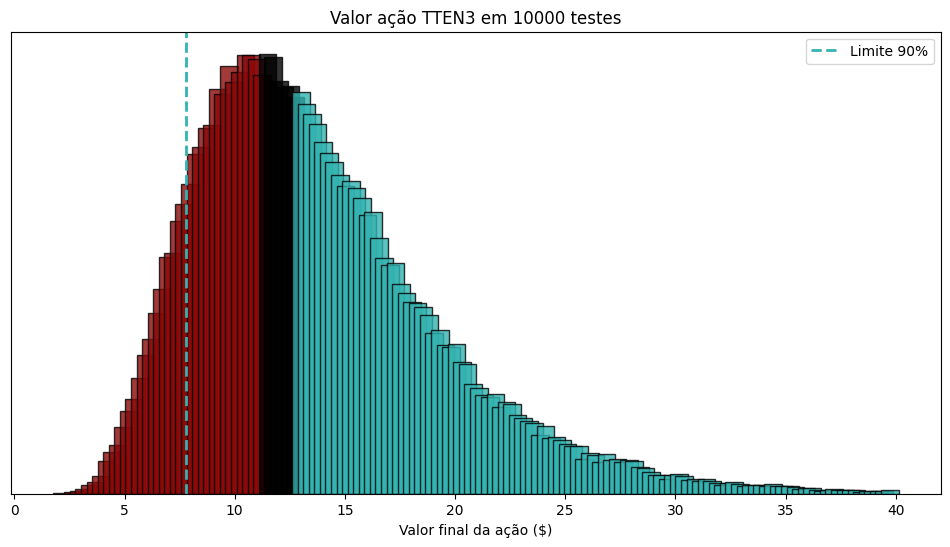

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
from matplotlib import font_manager

# Configuração da ação
acao = 'TTEN3.SA'

# Configuração do período de análise
data_final = dt.datetime.now() - dt.timedelta(days=12)
data_inicial = data_final - dt.timedelta(days=300)

# Obtém os preços da ação
precos = yf.download(acao, data_inicial, data_final)['Adj Close']

# Calcula os retornos diários
retornos = precos.pct_change().dropna()

# Configuração da simulação
numero_de_simulacoes = 100000
anos = 1
dias_projetados = 252  * anos
ultimaCotacao = precos.iloc[-1]


# Simulação de Monte Carlo
retornos_medio = retornos.mean()
volatilidade = retornos.std()

# Lista para armazenar os valores finais da ação em cada simulação
valores_finais = np.zeros(numero_de_simulacoes)

for s in range(numero_de_simulacoes):
    Rpdf = np.random.normal(size=(dias_projetados,1))

    retornos_sinteticos = retornos_medio + Rpdf * volatilidade

    # Calcula o valor final da ação ao final de cada simulação
    valor_final = ultimaCotacao * np.cumprod(1 + retornos_sinteticos)[-1]
    valores_finais[s] = valor_final

# Plotagem do histograma dos valores finais
config = dict(histtype='stepfilled', alpha=0.8, density=False, bins=150)

fig, ax = plt.subplots(figsize=(12, 6))

# Calcula o histograma
valores_finais_finais = [valor for valor in valores_finais if valor < 40]
hist, bin_edges = np.histogram(valores_finais_finais, bins=150, density=False)

# Mapeia cores para cada intervalo
cores = np.select([bin_edges < precos.iloc[-1], (bin_edges >= 13) & (bin_edges <= 13), bin_edges > 13], ['#8B0808', '#002060', '#33B3B1'])

# Plotagem do histograma com diferentes cores para cada intervalo
ax.bar(bin_edges[:-1], hist, color=cores, edgecolor='black', alpha=0.8)
noventaAcima = np.percentile(valores_finais, 10)
perda = np.percentile(valores_finais, 38)

mediana = np.percentile(valores_finais_finais, 50)
plt.axvline(noventaAcima, color='#33B3B1', linestyle='dashed', linewidth=2, label='Limite 90%')
#plt.axvline(perda, color='white', linestyle='dashed', linewidth=2, label='Limite 90%')

#fonte = {'family': 'Arial', 'color': 'black', 'weight': 'regular', 'size': 20}
# Quero outra fonte

# Configurando a fonte

ax.set_yticks([])

ax.set_title('Valor ação TTEN3 em 10000 testes')
ax.set_xlabel('Valor final da ação ($)')

# Adiciona uma seta e um texto "Preço Alvo" na posição y=15 no eixo y

# Adiciona a legenda no canto superior direito
plt.legend(loc='upper right')

plt.show()
